In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

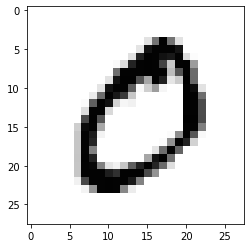

In [3]:
plt.imshow(x_train[1], cmap='Greys')

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_cat_test = to_categorical(y_test,10)

In [6]:
y_cat_train = to_categorical(y_train,10)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [9]:
x_test = x_test.reshape(10000,28,28,1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,363,210
Trainable params: 2,363,210
Non-trainable params: 0
______________________________________________

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [14]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0270 - accuracy: 0.9617 - val_loss: 0.0102 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0090 - accuracy: 0.9875 - val_loss: 0.0079 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0056 - accuracy: 0.9929 - val_loss: 0.0074 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0037 - accuracy: 0.9953 - val_loss: 0.0084 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0025 - accuracy: 0.9973 - val_loss: 0.0077 - val_accuracy: 0.9896


In [15]:
losses = pd.DataFrame(model.history.history)

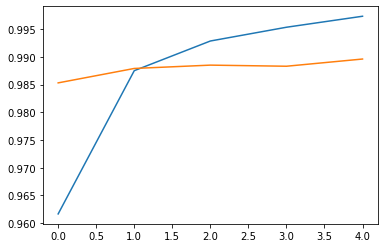

In [16]:
plt.plot(losses[['accuracy', 'val_accuracy']])

<AxesSubplot:>

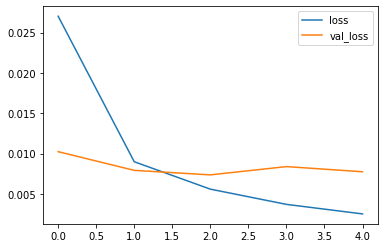

In [17]:
losses[['loss', 'val_loss']].plot()

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.007741110399365425, 0.9896000027656555]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions = np.argmax(predictions, axis=1)

In [23]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
y_test.shape

(10000,)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [27]:
matrix = confusion_matrix(y_test, predictions)

In [28]:
import seaborn as sns

<AxesSubplot:>

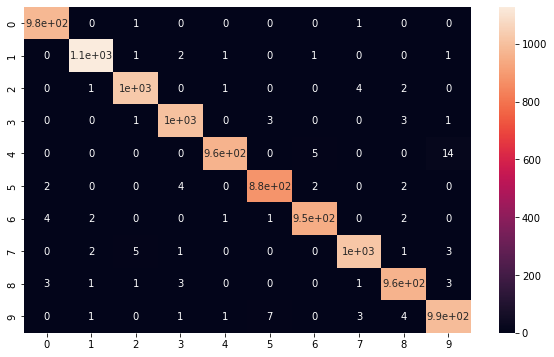

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True)

In [30]:
my_number = x_test[0]

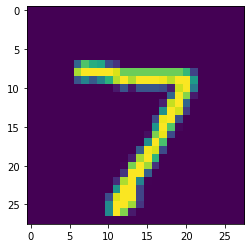

In [31]:
plt.imshow(my_number.reshape(28,28))

In [32]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)